# Kepler et Runge-Kutta 4
## Travail personnel 1, MATH-F-314, Année académique 2017-2018
## Contexte
Sous l'effet de la force de pesanteur, deux masses $m_1$ et $m_2$ s'attirent avec des forces mutuellement opposées selon la loi de Newton:
$${\bf F}_{1,2}=-{\bf F}_{2,1}=-\frac{Gm_1 m_2{\bf r}}{r^3}$$

Dans l'expression des forces, ${\bf r}$ est le vecteur qui relie le centre de $m_2$ à celui de $m_1$ et $G=6.67408\cdot 10^{-11} {\rm m^3 kg^{−1}s^{−2}}$.
Si les deux masses ne sont sommises qu'à ces forces de pesanteur, leur mouvement relatif sera une section de conique (ellipse, parabole ou hyperbole) dont la nature dépendra des conditions initiales. Dans le cas du système Terre-Lune, celle-ci est une ellipse dont l'équation est:

$$r(\theta)=\frac{r_{min}(1+\epsilon)}{1+\epsilon \cos\theta}.$$

Dans l'équation ci-dessus, $r_{min}$ est la distance minimale Terre-Lune (périgée) et $\epsilon$ est l'excentricité de l'orbite. Ici on prendra,
$$r_{min}=362600 {\rm km} \\ \epsilon = 0.0549006 \\ m_{\rm terre}=5.972\cdot 10^{24} {\rm kg} \\ m_{\rm lune}=7.348\cdot 10^{22} {\rm kg}$$
Par ailleurs, on indique qu'au périgée de la trajectoire, la lune se déplace par rapport à la terre à une vitesse de $1083.434974 {\rm ms^{-1}}$.

# Questions

### Question 1: résoudre les équations du mouvement sous l'effet des forces de pesanteur décrites ci-dessus et montrer que la trajectoire est bien une ellispe avec la bonne excentricité. Indice: placez-vous directement dans le repère attaché à la Terre et écrivez l'équation d'évolution pour ${\bf r}$.
La résolution numérique du problème doit se faire avec la méthode numérique 'Runge-Kutta 4' que vous trouverez ici:
https://en.wikipedia.org/wiki/Runge–Kutta_methods#The_Runge.E2.80.93Kutta_method
et les résultats présentés doivent être obtenus avec un pas de temps de $dt=1s$.Questions


Pour résoudre les équations du mouvement nous nous plaçons dans le repère du centre de masse.

${\bf Xt}$=vecteur centre de masse-terre

${\bf Xl}$=vecteur centre de masse-lune

Mt=masse de la terre

ml=masse de la lune

${\bf r}$=veceur terre-lune

$${\bf Xt}=\frac{Mt}{Mt+ml}{\bf r}$$

$${\bf Xl}=\frac{Ml}{Mt+ml}{\bf r}$$

$${\bf r}={\bf Xl}-{\bf Xt}$$

$$\ddot{\bf r}=\ddot{\bf Xl}-\ddot{\bf Xt}$$

Avec ces équations nous pouvons écrire les équations du mouvement pour la trajectoire de la lune 

$$\ddot{\bf Xt}=\frac{GMl\bf r}{r³}$$

$$\ddot{\bf Xl}=\frac{-GMt\bf r}{r³}$$

$$\ddot{\bf Xl}-\ddot{\bf Xt}=\frac{-GMt\bf r}{r³}-\frac{-GMl\bf r}{r³}$$

$$\ddot{\bf r}=\frac{-G\bf r}{r³}(Mt+ml)$$

nous avons donc 

$$\ddot{x}=\frac{-Gx(Mt+ml)}{(x²+y²)^(3/2)}$$

$$\ddot{y}=\frac{-Gy(Mt+ml)}{(x²+y²)^(3/2)}$$








Nous allons maintenant résoudre numériquement le problème avec la méthode de Runge-Kutta 4 trouverée ici: https://en.wikipedia.org/wiki/Runge–Kutta_methods#The_Runge.E2.80.93Kutta_method

Comme Runge-Kutta résoud des équations du type  
$$u' = h(t, u)$$ 
$$u(t_0) = u_0$$ 

Nous devons ramenez notre probème du 2eme ordre en 2 problème du 1er ordre 

$${\bf u}=\begin{pmatrix}x \\vx \\y \\vy\end{pmatrix}$$ ; $${h(u)}=\begin{pmatrix}vx \\ \frac{-G x (Mt + ml)}{(x² + y²)^(3/2)} \\vy \\ \frac{-G y (Mt + ml)}{(x² + y²)^(3/2)}\end{pmatrix}$$

avec,
x=coordonnée

vx=vitesse en x 

y=coordonnée

vy=vitesse en y

Avec ces équations pour ${\bf u}$ et ${\bf h(u)}$ nous pouvons utiliser Runge-Kutta et résoudre les équations  







In [83]:
# we load the libraries
from math import log, ceil, pi
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from matplotlib import animation 
from IPython.display import HTML
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Nous mettons en place les différents paramètre et condition initiale que nous allons utiliser 

In [84]:
x_0=-362600000 #[m]
y_0=0
vx_0=0
vy_0=1083.438974 #[m/s]

c=6.67408*10**(-11)*(5.972*10**24+7.348*10**22)


Nous définissons maintenant une fonction f(u) qui correspond à la fonction h(u) ci dessus 

In [85]:
def f(u):
    
    x = u[0]
    vx = u[1]
    y = u[2]
    vy = u[3]
    return numpy.array([vx, 
                        -c*x/(x*x+y*y)**(3/2), 
                        vy, 
                        -c*y/(x*x+y*y)**(3/2)])

Nous définissons maintenant la fonction Runge-Kutta 

In [86]:
def RK4(f,u,dt) :
    u_1=f(u)
    u_2=f(u+u_1*dt/2)
    u_3=f(u+u_2*dt/2)
    u_4=f(u+u_3*dt)
    
    
    
    return u+(dt/6)*(u_1+2*u_2+2*u_3+u_4)

Après avoir définis les paramètres, conditions initiales, f(u) et RK4 

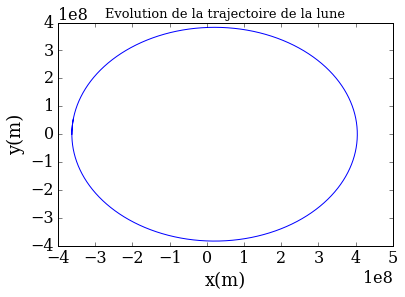

In [87]:
T=2400000  # Temps calculé en s
dt= 1      # pas de temps en s
N=int(T/dt+1) # nombre d'itérations
u_rk=numpy.empty((N,4)) #initialise la liste de longueur NN de dim 4
u_rk[0]   = numpy.array([x_0, vx_0, y_0, vy_0]) # implémente les valeurs initiales  dans la liste
for i in range(N-1):   # Calcule les valeurs (x,vx,y,vy) à l'aide de la méthode de Runge-Kutta d'ordre 4
    u_rk[i+1]=RK4(f, u_rk[i],dt)
x=u_rk[:,0]
y=u_rk[:,2]
vx=u_rk[:,1]
vy=u_rk[:,3]
plt.xlabel(r'x(m)', fontsize=18)
plt.ylabel(r'y(m)', fontsize=18)
plt.title('Evolution de la trajectoire de la lune', fontsize=13)
plt.plot(x,y)
plt.show()
plt.close()

Nous allons maintenant calculer l'excentriciter pour ce faire nous utilisons l'équation 

$$r(\theta)=\frac{r_{min}(1+\epsilon)}{1+\epsilon \cos\theta}.$$

Nous prenons  $\theta$ = 180° et donc  $r(\theta)$ = $r_{max}$

$$\frac{r_{max}-r_{min}}{r_{max}+r_{min}}=\epsilon$$

Nous avons donc 


In [46]:
q=(max(x)-362600000)/(max(x)+362600000)
print("Є =",q)  

Є = 0.0549078188737


### Question 6: animation des trajectoires

   
nous implémentons un graphe vide aux échelles souhaitées et ajoutons des axes, ensuite nous crééons une ligne qui évoluera à chaque itération. comme la commande ax.plot peut retourné plusieurs valeurs nous écrivons [0] de manière à être sûr qu'elle nous renvoit une ligne, la ligne "0". 


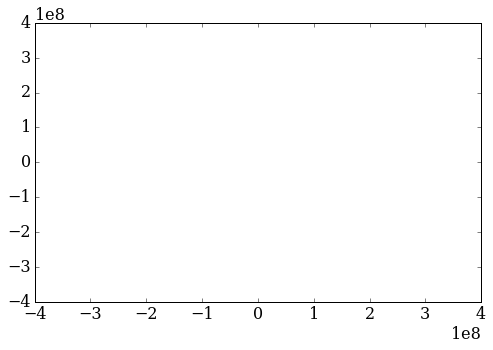

In [47]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(-4e8,4e8), ylim=(-4e8,4e8))
line = ax.plot([], [], color='#003366', ls='-', lw=3)[0]

Cette fonction est créé de manière à incrémenté les données de la ligne des solutions à chaque itération. 

In [48]:
def RK4_data1(data) :
    u_rk[i,0]
    u_rk[i,2]
    
    line.set_data(u_rk[i,0],u_rk[i,2])
    return line


Nous sauvegardons l'animation sous le nom de anim qui a pour argument le nom du graphique, la fonction, le nombre d'images, le temps d'apparition de l'image en ms.

In [49]:
anim = animation.FuncAnimation(fig, RK4_data1,
                               frames=4000, interval=1)

On utilise HTML que l'on a importé et html5_video() pour la rendre compatible avec le web.

In [50]:
HTML(anim.to_html5_video())

BrokenPipeError: [Errno 32] Broken pipe

Nous avons remarqué que calculer l'animation prenait trop de temps, pour remédier à cela nous avons décider de prendre au maximum 3000 frames et de manière à obtenir toute la trajectoire, il faut que les données calculer par anim soit à chaque fois la 8000* i ème itération pour l'évolution de la trajectoire de la Lune autour de la Terre

Cependant nous n'avons pas réussi à finaliser l'animation 

### Question 2: que vaut le demi grand axe a et le demi petit axe b selon vos calculs?

a = $\frac{|r_{min}| + |r_{max}|}{2}$ = demi grand axe

b = $|y_{max}|$ = demi petit axe 

In [40]:
rmin=-362600000
rmax=max(x)
ymax=max(y)

aa=(abs(rmin)+abs(rmax))/2
bb=abs(max(y))

print("demi grand axe a =",aa ,"m")
print("demi petit axe b =",bb,"m")


demi grand axe a = 383666278.529 m
demi petit axe b = 383087490.255 m


### Question 3: que vaut la période de l'orbite?

Grace à la 2eme loi de Képler, nous pouvons trouver la période de l'orbite en calculant le temps que met la lune pour atteindre l'apogée de sa trajectoir et en le multipliant par 2 

On cherche apres combien de pas on atteint l'apogée, donc apres combien de seconde on atteint l'apogée car dt=1s

In [7]:
print(numpy.where(x == max(x))) 

(array([1175355]),)


In [12]:
PP = 2*1175355
PPJ = (((PP/60)/60))/24
print("Période de l'orbite =",PP,"secondes")
print("Période de l'orbite =",PPJ, "jours")

Période de l'orbite = 2350710 secondes
Période de l'orbite = 27.207291666666666 jours


# Equations du mouvement théorique

Nous avons comme informations qu'il s'agit d'un système entre deux objets de masse $$m_{L}  et  m_{T}$$ qui a pour seul intéraction un potentiel gravitationnel entre les deux corps que l'on peut écrire comme:

$$ U(r)=-\frac{k}{r}$$

qui peut être réecrit comme:
$$ U_{eff}=-\frac{k}{r} + \frac{L^{2}}{2µr^{2}}$$ où
$$µ= \frac{m_{L}m_{T}}{m_{L}+m_{T}}$$
$$k=\textit{G}m_{L}m_{T}$$


étant donné qu'il s'agit d'un système où k>0 on sait que l'énergie $$E \le 0$$ on sait dès lors que le mouvement sera borné, et donc $$r_{p} \le r \le r_{a} $$ 

remarquons que si l'on dérive u en fonction de $$\theta$$ où $$u=\frac{1}{r}$$ on obtient: 

$$\frac{du}{d\theta} = -\frac{1}{r^{2}}\frac{dr}{\theta} = \frac{1}{r^2}\frac{\frac{dr}{dt}}{\frac{d\theta}{dt}} = -\frac{µ}{L}\frac{dr}{dt} $$car $$\frac{d\theta}{dt} = \frac{L}{µr^{2}}$$ selon la Loi des aires qui provient du fait que le mouvement cinétique L est une constante du mouvement.

Et donc l'énergie du mouvement relatif peut s'écrire comme :

$$E = \frac{L^{2}}{2µ}(\frac{du}{d\theta})^{2} -ku +\frac{L^{2}}{2µ}u^{2}$$

$$<=> (\frac{du}{d\theta})^{2} + (u-\frac{µk}{L^{2}})^{2} = \frac{2µE}{L^{2}} + \frac{(µk)^{2}}{L^{4}}$$

dérivons encore une fois par rapport $$\theta$$:

$$\frac{d^{2}u}{d\theta^{2}}= \frac{µk}{L^{2}} - u$$

$$<=> u=\frac{µk}{L^{2}}(1+\epsilon cos(\theta-\theta_{0}))$$ 

$$<=>r(1+\epsilon cos(\theta - \theta_{0}))= \frac{µk}{L^{2}}^{-1}$$ 

de plus $$r_{min}(1+\epsilon)= \frac{µk}{L^{2}}$$

$$ <=> r=\frac{r_{min}(1+\epsilon)}{1+\epsilon cos(\theta - \theta_{0}}  $$

Remarquons maintenant qu'il suffit de se mettre en coordonnées (x,y) et faire un changement de variable pour obtenir l'équation d'une éllipse centrée.

$$\left\{
\begin{array}{r c l}
 x&=& rcos(\theta-\theta_{0}) \\
 y&=&rsin(\theta - \theta_{0}) \\
 x'&=& x +\frac{\epsilon L^{2}}{µk(1 - \epsilon^{2})}
 y'&=& y
\end{array}
\right. $$ 


On obtient alors: 

$$\frac{x'^{2}}{a^{2}} + \frac{y'^{2}}{b^{2}} = 1 $$ 

où le demi grand axe est : 

$$ a = \frac{L^{2}}{µk(1-\epsilon^{2})}$$

le demi petit axe est:

$$ b= a\sqrt{1-\epsilon^{2}}$$

étant donné les valeurs initiales données dans l'énoncé du travail:

$$r_{min}= -362600000 m$$
$$\epsilon= 0.0549006$$
$$ => L^{2} = r_{min}(1+ \epsilon)µk$$

Pour trouver la révolution de la lune autour de la Terre nous remarquons que la 2ème loi de Kepler qui nous dit que l'aire balayée de l'éllipse par le vecteur radial croît proportionnellement au temps.
Donc sachant que:

$$ \frac{dS}{dt} = \frac{L}{2µ} $$

on peut transformer cette équation en : 
$$ \frac{S}{T} = \frac{L}{2µ} $$
$$ <=> T = \frac{2µS}{L}$$ où 
$$S = \pi ab = \pi a^{2}\sqrt{1- \epsilon^{2}}$$
$$<=> T = \frac{2µ\pi a^{2} \sqrt{1-\epsilon^{2}}}{L} $$


In [65]:
rm=-362600000
e=0.0549006
mt=5.972*10**24
ml= 7.348*10**22
G=6.67408*10**(-11)
µ=(mt*ml)/(mt+ml)
k=G*mt*ml
L2=abs(rm)*(1+e)*µ*k
a=L2/(µ*k*(1-e**2))
b=a*(1-e**2)**(1/2)
T= 2*µ*pi*a**2*(1-e**2)**(1/2)/(L2**(1/2))
print('le grand axe théorique est',a,"m")
print('le petit axe théorique est', b,"m")
print('La révolution est', T,"s")


le grand axe théorique est 383663348.0033952 m
le petit axe théorique est 383084716.44280225 m
La révolution est 2350683.930189676 s


### Question 4: quel est l'ordre de la méthode numérique utilisée (faite une représentation graphique comme celle discutée dans les modules du cours)?

On va étudier la convergence de la méthode de Rung-Kutta pour la trajectoire de la lune 

Nous allons prendre une séquence de solutions numériques du même problème, chacune avec un nombre différent de points de grille temporelle (dt_values)

In [72]:
dt_values = numpy.array([50, 10, 5, 2, 1])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt) + 1    # nombre d'itération 

    u = numpy.empty((N, 4)) #initialise la liste de longueur N de dim 4
    u[0] = numpy.array([x_0, vx_0, y_0, vy_0]) # implémente les valeurs initiales  dans la liste


    for n in range(N-1):
       
        u[n+1] = RK4(f, u[n],  dt)   ### call RK4 ###
    
    u_values[i] = u

Nous définisons maintenant une fonction pour obtenir les différences entre les grilles les plus grossières et les plus fines

In [74]:
def get_diffgrid(u_current, u_fine, dt):
    
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = ceil(N_fine/N_current)
    
    diffgrid = dt * numpy.sum( numpy.abs(\
            u_current[:,2]- u_fine[::grid_size_ratio,2])) 
    
    return diffgrid

Maintenant que notre fonction est définie calculons les différences de grille pour chaque solution

In [75]:
diffgrid = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    print('dt = {}'.format(dt))

    ### call the function get_diffgrid() ###
    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt)

dt = 50
dt = 10
dt = 5
dt = 2
dt = 1


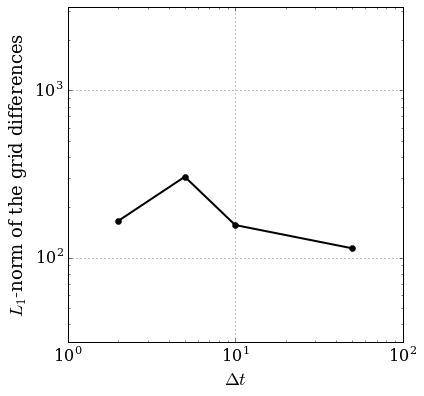

In [77]:
# log-log plot of the grid differences
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=18)
pyplot.ylabel('$L_1$-norm of the grid differences', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], color='k', ls='-', lw=2, marker='o');

Nous calculons maintenant l'ordre de convergence p donné par:

$$p = \frac{\log(\frac{f3−f2}{f2−f1})}{log(r)}$$

Où f1 est la solution la plus fine, et f3 la plus grossière.

In [82]:
r = 2
dt =150

dt_values2 = numpy.array([dt, r*dt, r**2*dt])

u_values2 = numpy.empty_like(dt_values2, dtype=numpy.ndarray)

diffgrid2 = numpy.empty(2)

for i, dt in enumerate(dt_values2):
    
    N = int(T/dt) + 1   # nombre de pas 

    # initialize the array containing the solution for each time-step
    u = numpy.empty((N, 4))
    u[0] = numpy.array([x_0, vx_0, y_0, vy_0])

    # time loop
    for n in range(N-1):

        u[n+1] = RK4(f, u[n],  dt)         ### call RK4 ###
    
    # store the value of u related to one grid
    u_values2[i] = u
    

#calculate f2 - f1
diffgrid2[0] = get_diffgrid(u_values2[1], u_values2[0], dt_values2[1])

#calculate f3 - f2
diffgrid2[1] = get_diffgrid(u_values2[2], u_values2[1], dt_values2[2])

# calculate the order of convergence
p = (log(diffgrid2[1]) - log(diffgrid2[0])) / log(r)

print("l'ordre de convergence est p = {:.3f}".format(p));

l'ordre de convergence est p = 3.993


On remarque que l'ordre de la méthode numérique est 4 de plus on remarque que si l'on prend un pas trop faible, la précision de la méthode numérique employée empeche d'évaluer la convergence 

### Question 5: calcul de la trajectoire d'un astéroïde
Les consignes pour cette question sont de trouver la position d'un astéroïde qui n'influence pas la trajectoire du système Lune-Terre après 14 jours sachant que cet astéroïde passe au centre de l'éllipse Lune-Terre avec pour vitesse $$(v_{x},v_{y})=(-500,500)ms^{-1}$$ 

Ainsi nous donnons les valeurs initiales aux problèmes ci dessous.


In [88]:
#initial values asteroid and moon 
xa_0=21066278.5295
ya_0=0
vxa_0=-500
vya_0=500

xl_0=404732557.059
yl_0=418.8353377
vxl_0=0.00106283312789
vyl_0=-970.653250202

cc=6.67408*10**(-11)*(5.972*10**24+7.348*10**22)  #G*(Mt+ml)
k=6.67408*10**(-11)*5.972*10**24   #G*Mt
p=6.67408*10**(-11)*7.348*10**22   #G*ml


En utilisant le même raisonnement suivi à la **Question 1 **(étant donné que l'astéroïde ne modifie pas sa trajectoire), nous définissons ci dessous la fonction qui nous permet de calculer la trajectoire de la lune.

In [89]:
# fu pour lune appogée
def g(u):
    
    x = u[0]
    vx = u[1]
    y = u[2]
    vy = u[3]
    return numpy.array([vx, 
                        -cc*x/(x*x+y*y)**(3/2), 
                        vy, 
                        -cc*y/(x*x+y*y)**(3/2)])

Ci dessous nous définissons la fonction qui va nous permettre de calculer la trajectoire de l'astéroïde,
sachant que l'astéroïde n'influence pas la trajectoire du système Terre-Lune nous pouvons supposer que sa masse est négligeable et donc le référentiel du centre de masse reste inchangée par rapport à la **Question 1 **, à partir de ça nous pouvons donc trouver aisément les équations de mouvement pour l'astéroïde en terme de coordonnées (x,y).
$$\vec{w}=\begin{pmatrix}
   x_{s}  \\
  v_{xs}  \\
   y_{s} \\
 v_{ys}
  \end{pmatrix}$$ 
  $$\frac{\vec{dw}}{dt} = \begin{pmatrix}
  v_{xs} \\
  \frac{-Gm_{T}x_{s}}{(x_{s}^2+y_{s}^2)^\frac{3}{2}} - \frac{Gm_{L}(x_{s}-x_{L})}{((x_{s}-x_{L})^2+(y_{s}-y_{L})^2)^\frac{3}{2}} \\
  v_{ys} \\
  \frac{-Gm_{T}y_{s}}{(x_{s}^2+y_{s}^2)^\frac{3}{2}} - \frac{Gm_{L}(y_{s}-y_{L})}{((x_{s}-x_{L})^2+(y_{s}-y_{L})^2)^\frac{3}{2}} \\
  \end{pmatrix} $$

In [90]:
# fu pour l'astéroïde
def h(w):
    
    xa = w[0]
    vxa = w[1]
    ya = w[2]
    vya = w[3]
    return numpy.array([vxa, 
                        (-k*xa/(xa*xa+ya*ya)**(3/2))-(p*(xa-u_rk[i,0])/((xa-u_rk[i,0])**2+(ya-u_rk[i,2])**2)**(3/2)), 
                        vya, 
                        (-k*ya/(xa*xa+ya*ya)**(3/2))-(p*(ya-u_rk[i,2])/((xa-u_rk[i,0])**2+(ya-u_rk[i,2])**2)**(3/2))])

Nous implémentons maintenant la cellule qui va dessiner le graphique et calculer la trajectoire de l'astéroïde.
Pour cela nous fixons le nombre d'itérations à la valeur demandée( 14 jours)
ensuite on initialise une liste vide de dimension 4, ensuite on ajoute les premières valeurs qui sont les valeurs initiales et après on utilise RK4 pour obtenir la position dans un premier de la Lune et ensuite nous recommençons de la même manière mais cette fois ci avec les valeurs initiales de l'astéroïde.
Ce qui nous permet donc de calculer sa position.
Et enfin nous créons un graphique qui a pour axe (la position x de l'astéroïde, la position y de l'astéroïde)

[  2.10662785e+07   2.10657781e+07   2.10652767e+07 ...,  -2.35645539e+11
  -2.35645806e+11  -2.35646073e+11]


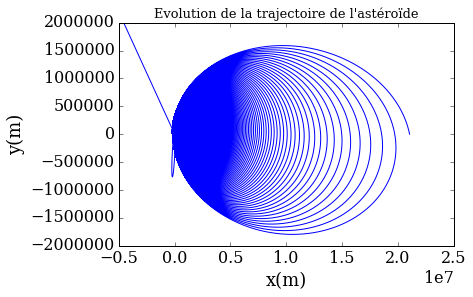

In [91]:
TT=14*24*60*60  # Temps calculé en s
dtt=1           # pas de temps en s
NN=int(TT/dtt+1)# nombre d'itérations
u_rk = numpy.empty((NN,4)) #initialise la liste de longueur NN de dim 4
u_rk[0]   = numpy.array([xl_0, vxl_0, yl_0, vyl_0])# implémente les valeurs initiales  dans la liste
for i in range(NN-1): # Calcule les valeurs (x,vx,y,vy) à l'aide de la méthode de Runge-Kutta d'ordre 4
    u_rk[i+1]=RK4(g, u_rk[i],dtt)

w_rk=numpy.empty((NN,4))   #initialise la liste de longueur NN de dim 4
w_rk[0] = numpy.array([xa_0, vxa_0, ya_0, vya_0])  # implémente les valeurs initiales dans la liste
for i in range(NN-1):      # Calcule les valeurs (x,vx,y,vy) à l'aide de la méthode de Runge-Kutta d'ordre 4
        w_rk[i+1]=RK4(h, w_rk[i], dtt)
    
print(w_rk[:,0])    
plt.xlabel(r'x(m)', fontsize=18)
plt.ylabel(r'y(m)', fontsize=18)
plt.title("Evolution de la trajectoire de l'astéroïde", fontsize=13)
plt.plot(w_rk[:,0],w_rk[:,2])
plt.xlim(-0.5e7,2.5e7)
plt.ylim(-2e6,2e6)
plt.show()
plt.close()


### Question 6: animation des trajectoires



nous implémentons un graphe vide aux échelles souhaitées et ajoutons des axes, ensuite nous crééons une ligne qui évoluera à chaque itération.
comme la commande ax.plot peut retourné plusieurs valeurs nous écrivons [0] de manière à être sûr qu'elle nous renvoit une ligne, la ligne "0".


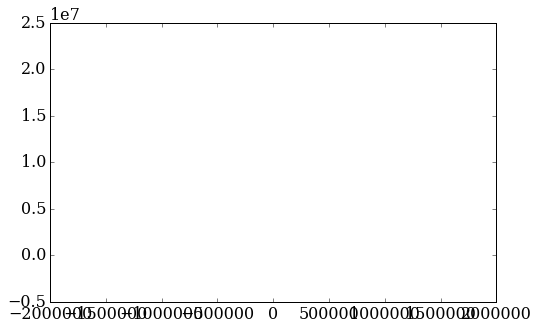

In [17]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(-2e6,2e6), ylim=(-0.5e7,2.5e7))
line = ax.plot([], [], color='#003366', ls='-', lw=3)[0]

Cette fonction est créé de manière à incrémenté les données de la ligne des solutions à chaque itération.

In [18]:
def RK4_data2(data) :
    
    line.set_data(w_rk[i,0],w_rk[i,2])


Nous sauvegardons l'animation sous le nom de anim qui a pour argument le nom du graphique, la fonction, le nombre d'images, le temps d'apparition de l'image en ms.

In [28]:
anim2 = animation.FuncAnimation(fig, RK4_data2,
                               frames=400, interval=1)

On utilise HTML que l'on a importé et html5_video() pour la rendre compatible avec le web.

In [20]:
HTML(anim.to_html5_video())

Nous avons remarqué que calculer l'animation prenait trop de temps, pour remédier à cela nous avons décider de prendre au maximum 3000 frames et de manière à obtenir toute la trajectoire, il faut que les données calculer par anim soit à chaque fois la 4032* i ème itération pour l'évolution de la trajectoire de l'astéroïde dans le système Terre-Lune

Cependant nous n'avons pas réussi à finaliser l'animation 

# Référence :

Chapitre 5: Mouvement dans un potentiel central, Mécanique analytique, Pierre Gaspard

NumericalMooc: 

Module1: Phugoid Model

Module2: Space and Time